In [1]:
import numpy as np                # Necessary libraries for data manipulation and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
oil_prices = pd.read_csv('oil_prices_eu.csv')   # Bringing in the raw data

In [3]:
oil_prices.head(10)

,DATE,DCOILBRENTEU
0,20/05/1987,18.63
1,21/05/1987,18.45
2,22/05/1987,18.55
3,25/05/1987,18.6
4,26/05/1987,18.63
5,27/05/1987,18.6
6,28/05/1987,18.6
7,29/05/1987,18.58
8,01/06/1987,18.65
9,02/06/1987,18.68


In [4]:
oil_prices.info()       # Checking number of observations, missing valuese and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATE          9704 non-null   object
 1   DCOILBRENTEU  9704 non-null   object
dtypes: object(2)
memory usage: 151.8+ KB


In [5]:
oil_prices.describe()

,DATE,DCOILBRENTEU
count,9704,9704
unique,9704,5284
top,20/05/1987,.
freq,1,266


In [6]:
oil_prices.shape   # Checking dataframe shape

(9704, 2)

In [7]:
oil_prices.isna().sum()     # Checking for NaN values

DATE            0
DCOILBRENTEU    0
dtype: int64

In [8]:
oil_prices['year'] = oil_prices['DATE'].str[-4:]  # Extracting the year in order to isolate for missing dates

oil_prices.head(5)

,DATE,DCOILBRENTEU,year
0,20/05/1987,18.63,1987
1,21/05/1987,18.45,1987
2,22/05/1987,18.55,1987
3,25/05/1987,18.6,1987
4,26/05/1987,18.63,1987


In [9]:
oil_prices.insert(1, 'year', oil_prices.pop('year'))     # Moving 'year' column to the left of target variable

oil_prices.head(5)

,DATE,year,DCOILBRENTEU
0,20/05/1987,1987,18.63
1,21/05/1987,1987,18.45
2,22/05/1987,1987,18.55
3,25/05/1987,1987,18.6
4,26/05/1987,1987,18.63


In [10]:
oil_prices['year'].value_counts().sort_index()         # Inspecting whether equal number of observations per year

1987    162
1988    261
1989    260
1990    261
1991    261
1992    262
1993    261
1994    260
1995    260
1996    262
1997    261
1998    261
1999    261
2000    260
2001    261
2002    261
2003    261
2004    262
2005    260
2006    260
2007    261
2008    262
2009    261
2010    261
2011    260
2012    261
2013    261
2014    261
2015    261
2016    261
2017    260
2018    261
2019    261
2020    262
2021    261
2022    260
2023    260
2024    151
Name: year, dtype: int64

In [11]:
oil_prices = oil_prices[~((oil_prices['year'] == '1987') | (oil_prices['year'] == '2024'))].reset_index(drop = True) 

# Removing years with missing data

oil_prices['year'].value_counts().sort_index()  # Checking requested years are removed

1988    261
1989    260
1990    261
1991    261
1992    262
1993    261
1994    260
1995    260
1996    262
1997    261
1998    261
1999    261
2000    260
2001    261
2002    261
2003    261
2004    262
2005    260
2006    260
2007    261
2008    262
2009    261
2010    261
2011    260
2012    261
2013    261
2014    261
2015    261
2016    261
2017    260
2018    261
2019    261
2020    262
2021    261
2022    260
2023    260
Name: year, dtype: int64

In [12]:
oil_prices['month'] = oil_prices['DATE'].str[3:5]     # Extracting the month number in order to isolate for missing dates

oil_prices.insert(2, 'month', oil_prices.pop('month'))     # Moving 'month' column to the left of target variable

oil_prices.head(5)

,DATE,year,month,DCOILBRENTEU
0,01/01/1988,1988,01,.
1,04/01/1988,1988,01,17.95
2,05/01/1988,1988,01,17.08
3,06/01/1988,1988,01,17.9
4,07/01/1988,1988,01,.


In [13]:
oil_prices['month'].value_counts().sort_index()         # Inspecting whether equal number of observations per month

01    796
02    726
03    800
04    769
05    798
06    773
07    794
08    800
09    771
10    795
11    774
12    795
Name: month, dtype: int64

In [14]:
oil_prices['DATE'] = pd.to_datetime(oil_prices['DATE'], format = '%d/%m/%Y')    # Converting 'DATE' column to datetime format

oil_prices['day'] = oil_prices['DATE'].dt.day_name()   # Extracting the 'day' name in order to isolate for missing dates

oil_prices.insert(3, 'day', oil_prices.pop('day'))     # Moving 'day' column to the left of target variable

oil_prices.head(5)         # Appears to be some observations with no numeric value input for 'DCOILBRENTEU' column

,DATE,year,month,day,DCOILBRENTEU
0,1988-01-01,1988,01,Friday,.
1,1988-01-04,1988,01,Monday,17.95
2,1988-01-05,1988,01,Tuesday,17.08
3,1988-01-06,1988,01,Wednesday,17.9
4,1988-01-07,1988,01,Thursday,.


In [15]:
oil_prices['day'].value_counts().sort_index()           # Inspecting whether equal number of observations per day of week


# Confirmed days are all weekdays only and roughly same amount per day (can account for leapyears/public holidays etc.)

Friday       1879
Monday       1878
Thursday     1878
Tuesday      1878
Wednesday    1878
Name: day, dtype: int64

In [16]:
oil_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          9391 non-null   datetime64[ns]
 1   year          9391 non-null   object        
 2   month         9391 non-null   object        
 3   day           9391 non-null   object        
 4   DCOILBRENTEU  9391 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 367.0+ KB


In [17]:
oil_prices['numeric'] = pd.to_numeric(oil_prices['DCOILBRENTEU'], errors = 'coerce')  

# Converting target variable to numeric values

non_numeric = oil_prices[oil_prices['numeric'].isna()]   # Showing NaN's meaning non-numeric values present for target variable

print('non-numeric values is:') # 259 rows with non-numeric value
print(non_numeric)

non-numeric values is:
           DATE  year month       day DCOILBRENTEU  numeric
0    1988-01-01  1988    01    Friday            .      NaN
4    1988-01-07  1988    01  Thursday            .      NaN
17   1988-01-26  1988    01   Tuesday            .      NaN
65   1988-04-01  1988    04    Friday            .      NaN
66   1988-04-04  1988    04    Monday            .      NaN
...         ...   ...   ...       ...          ...      ...
9221 2023-05-08  2023    05    Monday            .      NaN
9236 2023-05-29  2023    05    Monday            .      NaN
9301 2023-08-28  2023    08    Monday            .      NaN
9386 2023-12-25  2023    12    Monday            .      NaN
9387 2023-12-26  2023    12   Tuesday            .      NaN

[259 rows x 6 columns]


In [18]:
oil_prices.insert(4, 'numeric', oil_prices.pop('numeric'))     # Moving 'numeric' column to the left of target variable

oil_prices.head(5)

,DATE,year,month,day,numeric,DCOILBRENTEU
0,1988-01-01,1988,01,Friday,NaN,.
1,1988-01-04,1988,01,Monday,17.95,17.95
2,1988-01-05,1988,01,Tuesday,17.08,17.08
3,1988-01-06,1988,01,Wednesday,17.90,17.9
4,1988-01-07,1988,01,Thursday,NaN,.


In [19]:
mask_nan = oil_prices['numeric'].isna()       # Creating mask for non-numeric values
mask_numeric = ~mask_nan                      # Creating mask for numeric values

In [20]:
oil_prices['DATE'] = pd.to_datetime(oil_prices['DATE'])   # Ensuring 'DATE' column is in datetime format
oil_prices['numeric'] = pd.to_numeric(oil_prices['numeric'], errors = 'coerce') # Ensuring 'numeric' column is in numeric format

In [21]:
print(oil_prices['DATE'][mask_nan])       # Ensuring data is present for mask_nan in 'DATE' and 'numeric' columns
print(oil_prices['numeric'][mask_nan])

0      1988-01-01
4      1988-01-07
17     1988-01-26
65     1988-04-01
66     1988-04-04
          ...    
9221   2023-05-08
9236   2023-05-29
9301   2023-08-28
9386   2023-12-25
9387   2023-12-26
Name: DATE, Length: 259, dtype: datetime64[ns]
0      NaN
4      NaN
17     NaN
65     NaN
66     NaN
        ..
9221   NaN
9236   NaN
9301   NaN
9386   NaN
9387   NaN
Name: numeric, Length: 259, dtype: float64


In [22]:
print(mask_nan)
print(mask_numeric)

0        True
1       False
2       False
3       False
4        True
        ...  
9386     True
9387     True
9388    False
9389    False
9390    False
Name: numeric, Length: 9391, dtype: bool
0       False
1        True
2        True
3        True
4       False
        ...  
9386    False
9387    False
9388     True
9389     True
9390     True
Name: numeric, Length: 9391, dtype: bool


In [366]:
#import matplotlib.dates as mdates

#plt.figure(figsize = (10, 6))

#plt.plot(oil_prices['DATE'][mask_nan], oil_prices['numeric'][mask_nan], 'ro', label = 'NaN')
#plt.plot(oil_prices['DATE'][mask_numeric], oil_prices['numeric'][mask_numeric], 'b-', label = 'Numeric')

#plt.xlim(oil_prices['DATE'].min(), oil_prices['DATE'].max())
#plt.ylim(oil_prices['numeric'].min() - 10, oil_prices['numeric'].max() + 10)

#plt.xlabel('DATE')
#plt.ylabel('Value')
#plt.title('Non-Numeric values plotted as NaN')

#plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))

#plt.gcf().autofmt_xdate()

#plt.legend()

#plt.show()

In [365]:
#print(plt.ylim())

In [25]:
NaN = oil_prices.isna().sum()    # Identifying where NaN values are

print(NaN)

DATE              0
year              0
month             0
day               0
numeric         259
DCOILBRENTEU      0
dtype: int64


In [367]:
#plt.figure(figsize = (10, 6))
#sns.heatmap(oil_prices.isnull(), cbar = False, cmap = "viridis")

#plt.title("Heatmap of NaN Values")          # Displaying NaN values in heatmap

#plt.show()


In [368]:
#nan_locations = oil_prices['numeric'].isnull()

#plt.figure(figsize = (10, 6))
#plt.plot(nan_locations, marker = 'o', linestyle = 'None')
#plt.title('NaN values in numeric')
#plt.xlabel('DATE')
#plt.ylabel('NaN Presence')

#plt.show()

In [28]:
nan_filtered_oil_prices = oil_prices[oil_prices['numeric'].isna()]
#count_other_columns = nan_filtered_oil_prices.drop(columns = 'numeric').apply(pd.Series.value_counts)
                                     
year_counts = nan_filtered_oil_prices['year'].value_counts()                                    

print(year_counts) # Showing the NaN values per year, no discernible pattern
                                     

1997    13
1999    12
2012    12
2011    12
2007    11
2009     9
2008     9
2013     9
2018     9
2023     9
1993     9
2010     9
1998     8
1996     8
1994     8
2021     8
2022     8
2000     7
1995     7
2014     7
2020     7
2016     6
2015     6
1988     6
1989     6
2002     6
1992     5
1990     5
2006     5
2017     4
2001     4
2019     4
1991     4
2005     3
2003     3
2004     1
Name: year, dtype: int64


In [29]:
month_counts = nan_filtered_oil_prices['month'].value_counts()                                  

print(month_counts) # Showing the NaN values per month, no discernible pattern, December a bit heavy, possibly public holidays
                                     

12    61
01    45
04    44
05    41
08    13
02    12
07    12
09    10
03     9
11     9
06     3
Name: month, dtype: int64


In [30]:
day_counts = nan_filtered_oil_prices['day'].value_counts()                                  

print(day_counts) # Showing the NaN values per day, Mondays stand out out with some Fridays, possible public holidays across EU

Monday       135
Friday        56
Tuesday       31
Thursday      21
Wednesday     16
Name: day, dtype: int64


In [31]:
oil_prices['numeric'].isna().sum()

259

In [369]:
#oil_prices['NaN Present'] = oil_prices['numeric'].isnull().astype(int)

#plt.figure(figsize= (14, 7))
#plt.plot(oil_prices['DATE'], oil_prices['NaN Present'], marker = 'o', linestyle = '-', color = 'red', label = 'NaN presence in numeric')

#plt.title('NaN values in numeric Column')
#plt.xlabel('Date')
#plt.ylabel('NaN Presence (1 if NaN, 0 if not)')
#plt.yticks([0, 1], ['No NaN', 'NaN'])
#plt.grid(True)
#plt.legend()

#plt.show()        # Displaying NaN values in 'numeric' column to see spread of non numeric values


In [33]:
oil_prices.head(10)

,DATE,year,month,day,numeric,DCOILBRENTEU,NaN Present
0,1988-01-01,1988,01,Friday,NaN,.,1
1,1988-01-04,1988,01,Monday,17.95,17.95,0
2,1988-01-05,1988,01,Tuesday,17.08,17.08,0
3,1988-01-06,1988,01,Wednesday,17.90,17.9,0
4,1988-01-07,1988,01,Thursday,NaN,.,1
5,1988-01-08,1988,01,Friday,16.88,16.88,0
6,1988-01-11,1988,01,Monday,16.65,16.65,0
7,1988-01-12,1988,01,Tuesday,15.95,15.95,0
8,1988-01-13,1988,01,Wednesday,16.38,16.38,0
9,1988-01-14,1988,01,Thursday,16.55,16.55,0


In [34]:
oil_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          9391 non-null   datetime64[ns]
 1   year          9391 non-null   object        
 2   month         9391 non-null   object        
 3   day           9391 non-null   object        
 4   numeric       9132 non-null   float64       
 5   DCOILBRENTEU  9391 non-null   object        
 6   NaN Present   9391 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(4)
memory usage: 477.0+ KB


In [35]:
oil_prices.rename(columns = {'DCOILBRENTEU': 'price'}, inplace = True)   # Renaming 'DCOILBRENTEU' column to 'price'

oil_prices.head(5)

,DATE,year,month,day,numeric,price,NaN Present
0,1988-01-01,1988,01,Friday,NaN,.,1
1,1988-01-04,1988,01,Monday,17.95,17.95,0
2,1988-01-05,1988,01,Tuesday,17.08,17.08,0
3,1988-01-06,1988,01,Wednesday,17.90,17.9,0
4,1988-01-07,1988,01,Thursday,NaN,.,1


In [36]:
oil_prices['price'] = pd.to_numeric(oil_prices['price'], errors = 'coerce')  # Changing non-numeric values to NaN in price column

oil_prices.head(5)

,DATE,year,month,day,numeric,price,NaN Present
0,1988-01-01,1988,01,Friday,NaN,NaN,1
1,1988-01-04,1988,01,Monday,17.95,17.95,0
2,1988-01-05,1988,01,Tuesday,17.08,17.08,0
3,1988-01-06,1988,01,Wednesday,17.90,17.90,0
4,1988-01-07,1988,01,Thursday,NaN,NaN,1


In [37]:
oil_prices = oil_prices.iloc[:, [0, 5]]        # Removing unneccessary columns

oil_prices.head(5)

,DATE,price
0,1988-01-01,NaN
1,1988-01-04,17.95
2,1988-01-05,17.08
3,1988-01-06,17.90
4,1988-01-07,NaN


In [38]:
oil_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    9391 non-null   datetime64[ns]
 1   price   9132 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.9 KB


In [39]:
oil_prices['price'].fillna(method = 'ffill', inplace = True) # Forward fill NaN values in 'price' column

oil_prices['price'].fillna(method = 'bfill', inplace = True) # Back fill beginning NaN value as nothing to forward fill it with

oil_prices['price'] = oil_prices['price'].fillna(method = 'ffill').fillna(method = 'bfill') # Apply changes to original column

oil_prices.head(10)

,DATE,price
0,1988-01-01,17.95
1,1988-01-04,17.95
2,1988-01-05,17.08
3,1988-01-06,17.90
4,1988-01-07,17.90
5,1988-01-08,16.88
6,1988-01-11,16.65
7,1988-01-12,15.95
8,1988-01-13,16.38
9,1988-01-14,16.55


In [40]:
oil_prices.info()  # NaN values have been forward and back-filled, column is now free of NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    9391 non-null   datetime64[ns]
 1   price   9391 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.9 KB


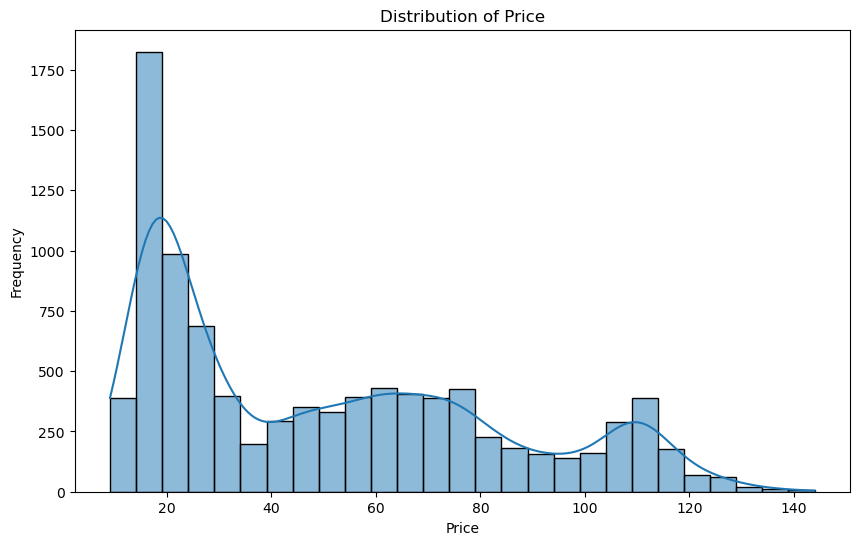

In [41]:
import scipy.stats as stats

plt.figure(figsize = (10, 6))                    # Checking distribution of data
sns.histplot(oil_prices['price'], kde = True)
plt.title('Distribution of Price')
plt.xlabel('Price')                             # Data skewed to the left
plt.ylabel('Frequency')

plt.show()

In [42]:
oil_prices.dtypes

DATE     datetime64[ns]
price           float64
dtype: object

In [43]:
oil_prices.shape

(9391, 2)

In [44]:
duplicate_rows = oil_prices[oil_prices.duplicated()]      # confirm no duplicates

print(duplicate_rows.shape)

(0, 2)


In [45]:
oil_prices.count()

DATE     9391
price    9391
dtype: int64

In [46]:
print(oil_prices.isnull().sum())

DATE     0
price    0
dtype: int64


In [47]:
print(oil_prices.isna().sum())

DATE     0
price    0
dtype: int64


In [48]:
oil_prices.to_csv('oil_prices_sense_check.csv') # sense checking in excel

<AxesSubplot:xlabel='price'>

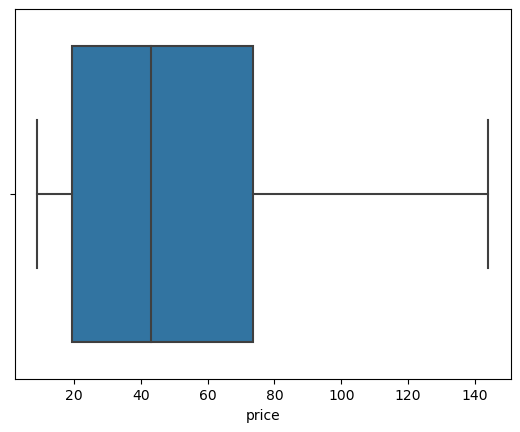

In [49]:
sns.boxplot(x = oil_prices['price'])         # Skewed to the left

In [50]:
Q1 = oil_prices['price'].quantile(0.25)         # Calculating interquartile range
Q3 = oil_prices['price'].quantile(0.75)
price_IQR = Q3 - Q1

print(price_IQR)

54.24500000000001


In [51]:
oil_prices = oil_prices[~((oil_prices['price'] < (Q1 - 1.5 * price_IQR)) | (oil_prices['price'] > (Q3 + 1.5 * price_IQR)))]

oil_prices.shape  # No outliers detected, same shape after outlier removal operation

(9391, 2)

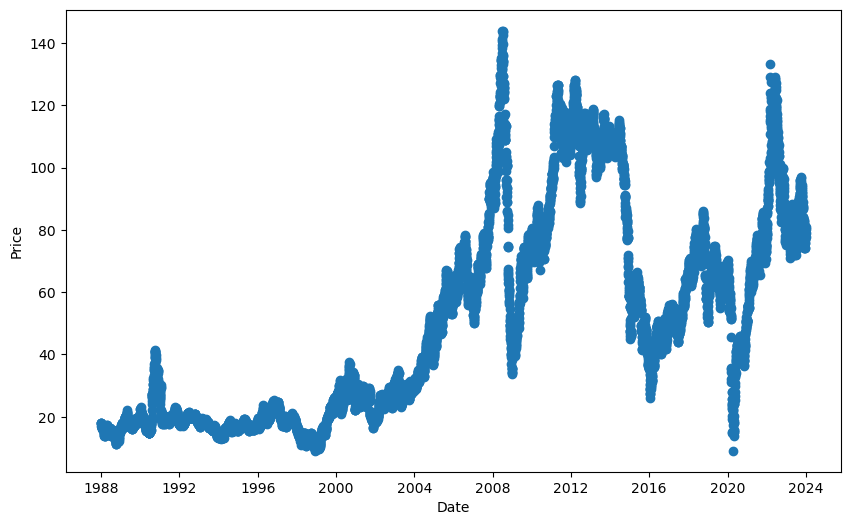

In [52]:
fig, ax = plt.subplots(figsize = (10, 6)) 
ax.scatter(oil_prices['DATE'], oil_prices['price'])
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.show()                        # Highly volatile data, particularly around 2008, 2020 and 2023, more steady upto 2000

In [53]:
oil_prices.head(5)

,DATE,price
0,1988-01-01,17.95
1,1988-01-04,17.95
2,1988-01-05,17.08
3,1988-01-06,17.90
4,1988-01-07,17.90


In [54]:
cut_off_date = pd.Timestamp('1998-12-31')

oil_prices = oil_prices[oil_prices['DATE'] <= cut_off_date]

print(oil_prices.shape)
print(oil_prices.head(5))         # Focusing on 1988-1998 only as steadier data to predict

(2870, 2)
        DATE  price
0 1988-01-01  17.95
1 1988-01-04  17.95
2 1988-01-05  17.08
3 1988-01-06  17.90
4 1988-01-07  17.90


In [55]:
Q1 = oil_prices['price'].quantile(0.25)         # Much smaller interquartile range
Q3 = oil_prices['price'].quantile(0.75)
price_IQR = Q3 - Q1

print(price_IQR)

3.4499999999999993


In [56]:
oil_prices = oil_prices[~((oil_prices['price'] < (Q1 - 1.5 * price_IQR)) | (oil_prices['price'] > (Q3 + 1.5 * price_IQR)))]

oil_prices.shape  # Outliers detected and removed

(2711, 2)

<AxesSubplot:xlabel='price'>

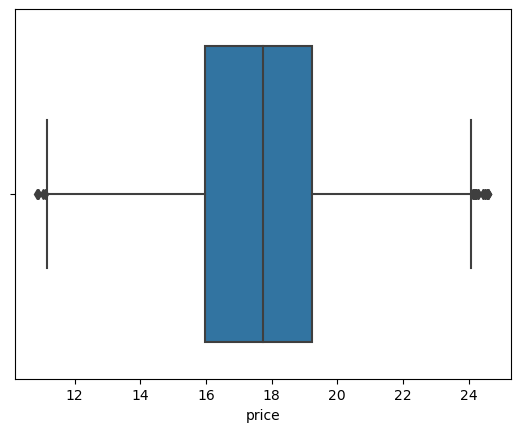

In [57]:
sns.boxplot(x = oil_prices['price'])         # A lot less skewed now after new selection and cleaning

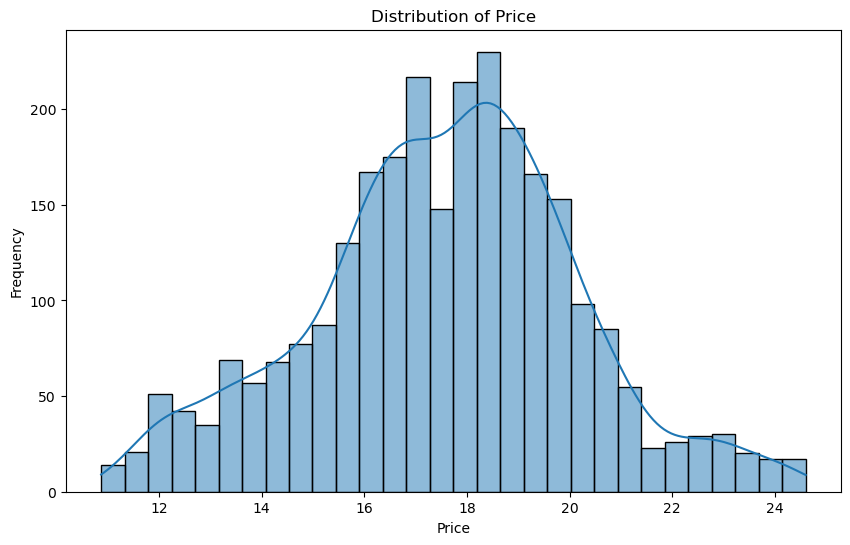

In [58]:
plt.figure(figsize = (10, 6))                    # Checking distribution of data
sns.histplot(oil_prices['price'], kde = True)
plt.title('Distribution of Price')
plt.xlabel('Price')                             # Data significantly more Gaussian now
plt.ylabel('Frequency')

plt.show()

# Train test split next

In [59]:
training_array = oil_prices.iloc[:, 1].values      # Extracting price data and converting into an array

print(training_array)

[17.95 17.95 17.08 ... 11.46 11.1  10.87]


In [60]:
training_data = training_array[:-20]   # Creating test data, last 20 values left out as these will become test data

testing_data = training_array[-20:len(training_array)]  # Creating the test data out of last 20 values

In [61]:
training_data.shape         # Checking shape, original size -20 as test data extracted

(2691,)

In [62]:
testing_data.shape         # Checking shape,20 days taken as test data

(20,)

In [63]:
print(testing_data)

[11.94 11.68 12.18 12.74 12.46 12.26 12.31 12.   12.43 11.93 11.88 11.73
 11.51 11.15 11.18 11.45 11.56 11.46 11.1  10.87]


# Training data and testing data

In [64]:
training_data = training_data.reshape(-1, 1)  # Reshaping the arrays to 2 Dimensions for neural network
testing_data = testing_data.reshape(-1, 1)


In [65]:
print(training_data)

[[17.95]
 [17.95]
 [17.08]
 ...
 [12.11]
 [11.6 ]
 [11.29]]


In [66]:
training_data.shape

(2691, 1)

In [67]:
testing_data.shape

(20, 1)

In [68]:
print(testing_data)

[[11.94]
 [11.68]
 [12.18]
 [12.74]
 [12.46]
 [12.26]
 [12.31]
 [12.  ]
 [12.43]
 [11.93]
 [11.88]
 [11.73]
 [11.51]
 [11.15]
 [11.18]
 [11.45]
 [11.56]
 [11.46]
 [11.1 ]
 [10.87]]


In [69]:
#from sklearn.preprocessing import MinMaxScaler      # Minmax scaling since data is non-Gaussian

#scaler_train = MinMaxScaler()
#scaled_training_data = scaler_train.fit_transform(training_data)

#scaler_test = MinMaxScaler()
#testing_data_reshaped = testing_data.reshape(-1, 1)
#scaled_testing_data = scaler_train.transform(testing_data)




In [70]:
from sklearn.preprocessing import StandardScaler      # Trialling StandardScaler as selected data is now gaussian

scaler = StandardScaler()
training_data = scaler.fit_transform(training_data)

testing_data = scaler.transform(testing_data)

In [71]:
print(training_data)        # checking training_data is normalised

[[ 0.13787032]
 [ 0.13787032]
 [-0.20182434]
 ...
 [-2.14237888]
 [-2.34151023]
 [-2.46255086]]


In [72]:
print(testing_data)        # checking testing_data is normalised

[[-2.208756  ]
 [-2.31027394]
 [-2.11504712]
 [-1.89639309]
 [-2.00572011]
 [-2.08381083]
 [-2.06428815]
 [-2.18532878]
 [-2.01743372]
 [-2.21266053]
 [-2.23218321]
 [-2.29075126]
 [-2.37665106]
 [-2.51721436]
 [-2.50550076]
 [-2.40007828]
 [-2.35712838]
 [-2.39617374]
 [-2.53673705]
 [-2.62654138]]


In [73]:
#log_training_data = np.log1p(training_data)

#log_testing_data = np.log1p(testing_data)

In [74]:
#boxcox_training_data, lambda_ = stats.boxcox(training_data)

#boxcox_testing_data = stats.boxcox(testing_data, lmbda = lambda_)

In [75]:
x_training_data = []          # Creating python lists to populate the timesteps
y_training_data = []


In [76]:
for i in range(20, len(training_data)):
    x_training_data.append(training_data[i-20:i, 0])
    y_training_data.append(training_data[i, 0])
    
# Populating 20 timesteps in x_training data and the next respective value in y_training_data 

In [77]:
x_training_data = np.array(x_training_data)           # Converting to numpy arrays for tensorflow
y_training_data = np.array(y_training_data)


In [78]:
print(x_training_data.shape) # Validated as correct shape as 2D, 20 timesteps, 9671 = len(training_data) - 20
print(y_training_data.shape) # Validated as 1D with 2671 = len(training_data) - 20, 

(2671, 20)
(2671,)


In [79]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0],
                                              x_training_data.shape[1],
                                              1))

# Reshaping x_training_data to 3D for RNN layer in Tensorflow

In [80]:
print(x_training_data.shape) # Checking new shape

(2671, 20, 1)


In [81]:
y_training_data.shape

(2671,)

In [82]:
#rnn = Sequential()                     # Initialise instance of Sequential class

In [83]:
#rnn.add(LSTM(units = 5, return_sequences = True, input_shape = (20, 1)))         # Architecting the Vanilla LSTM
#rnn.add(Dropout(0.2))

#rnn.add(LSTM(units = 5))
#rnn.add(Dropout(0.2))

#rnn.add(Dense(units = 1))

In [84]:
#rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')         # Compiling with standard optimizer and loss function

In [85]:
#rnn.fit(x_training_data, y_training_data, epochs = 10, batch_size = 1)  # Training the Vanilla LSTM model

In [86]:
testing_data.shape

(20, 1)

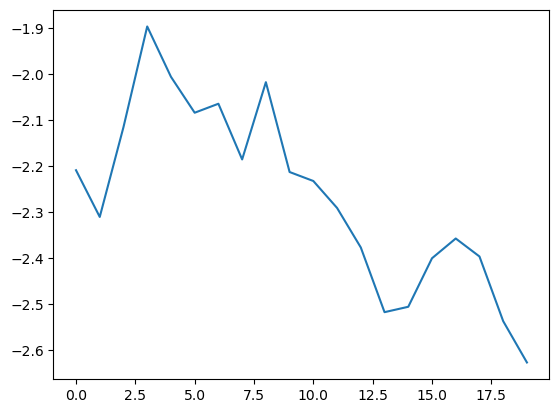

In [87]:
plt.plot(testing_data)

In [88]:
print(training_data)     

[[ 0.13787032]
 [ 0.13787032]
 [-0.20182434]
 ...
 [-2.14237888]
 [-2.34151023]
 [-2.46255086]]


In [89]:
print(testing_data)

[[-2.208756  ]
 [-2.31027394]
 [-2.11504712]
 [-1.89639309]
 [-2.00572011]
 [-2.08381083]
 [-2.06428815]
 [-2.18532878]
 [-2.01743372]
 [-2.21266053]
 [-2.23218321]
 [-2.29075126]
 [-2.37665106]
 [-2.51721436]
 [-2.50550076]
 [-2.40007828]
 [-2.35712838]
 [-2.39617374]
 [-2.53673705]
 [-2.62654138]]


In [90]:
print(y_training_data)

[-0.51418724 -0.58446889 -0.5532326  ... -2.14237888 -2.34151023
 -2.46255086]


In [91]:
oil_prices.shape

(2711, 2)

In [92]:
training_data.shape

(2691, 1)

In [93]:
testing_data.shape

(20, 1)

In [94]:
last_20_training = training_data[-20:]         # preparing data for x_testing data, timesteps leading up to predicted value
first_20_testing = testing_data[:20]           # Will concatenate these two variables to form x_testing_data

print(last_20_training)
print(first_20_testing)

[[-1.14281758]
 [-1.07644047]
 [-1.18967202]
 [-1.24433553]
 [-1.25604914]
 [-1.12719944]
 [-1.22481285]
 [-1.32242625]
 [-1.36537615]
 [-1.41223059]
 [-1.45127595]
 [-1.70507081]
 [-1.84563412]
 [-1.72459349]
 [-1.90029763]
 [-2.08381083]
 [-2.19313785]
 [-2.14237888]
 [-2.34151023]
 [-2.46255086]]
[[-2.208756  ]
 [-2.31027394]
 [-2.11504712]
 [-1.89639309]
 [-2.00572011]
 [-2.08381083]
 [-2.06428815]
 [-2.18532878]
 [-2.01743372]
 [-2.21266053]
 [-2.23218321]
 [-2.29075126]
 [-2.37665106]
 [-2.51721436]
 [-2.50550076]
 [-2.40007828]
 [-2.35712838]
 [-2.39617374]
 [-2.53673705]
 [-2.62654138]]


In [95]:
x_test_data = np.concatenate([last_20_training, first_20_testing]) # Taking last 20 test values and 20 preceding values

In [96]:
#x_test_data = oil_prices[len(oil_prices) - 40:] 
#x_test_data = x_test_data.iloc[:, 1].values
x_test_data.shape


(40, 1)

In [97]:
len(x_test_data)        # Contains 2 test values and 20 preceding values = 40

40

In [98]:
print(x_test_data)

[[-1.14281758]
 [-1.07644047]
 [-1.18967202]
 [-1.24433553]
 [-1.25604914]
 [-1.12719944]
 [-1.22481285]
 [-1.32242625]
 [-1.36537615]
 [-1.41223059]
 [-1.45127595]
 [-1.70507081]
 [-1.84563412]
 [-1.72459349]
 [-1.90029763]
 [-2.08381083]
 [-2.19313785]
 [-2.14237888]
 [-2.34151023]
 [-2.46255086]
 [-2.208756  ]
 [-2.31027394]
 [-2.11504712]
 [-1.89639309]
 [-2.00572011]
 [-2.08381083]
 [-2.06428815]
 [-2.18532878]
 [-2.01743372]
 [-2.21266053]
 [-2.23218321]
 [-2.29075126]
 [-2.37665106]
 [-2.51721436]
 [-2.50550076]
 [-2.40007828]
 [-2.35712838]
 [-2.39617374]
 [-2.53673705]
 [-2.62654138]]


In [99]:
x_test_data = np.reshape(x_test_data, (-1, 1))  # Reshaping array for predictions to 2D

In [100]:
print(x_test_data)

[[-1.14281758]
 [-1.07644047]
 [-1.18967202]
 [-1.24433553]
 [-1.25604914]
 [-1.12719944]
 [-1.22481285]
 [-1.32242625]
 [-1.36537615]
 [-1.41223059]
 [-1.45127595]
 [-1.70507081]
 [-1.84563412]
 [-1.72459349]
 [-1.90029763]
 [-2.08381083]
 [-2.19313785]
 [-2.14237888]
 [-2.34151023]
 [-2.46255086]
 [-2.208756  ]
 [-2.31027394]
 [-2.11504712]
 [-1.89639309]
 [-2.00572011]
 [-2.08381083]
 [-2.06428815]
 [-2.18532878]
 [-2.01743372]
 [-2.21266053]
 [-2.23218321]
 [-2.29075126]
 [-2.37665106]
 [-2.51721436]
 [-2.50550076]
 [-2.40007828]
 [-2.35712838]
 [-2.39617374]
 [-2.53673705]
 [-2.62654138]]


In [101]:
final_x_test_data = []                               # Grouping test data into 20 arrays of size 20 as timesteps for test

for i in range(20, len(x_test_data)):
    final_x_test_data.append(x_test_data[i-20:i, 0]) 
    
                                     
final_x_test_data = np.array(final_x_test_data)         # Turning into array for neural network

In [102]:
print(final_x_test_data)

[[-1.14281758 -1.07644047 -1.18967202 -1.24433553 -1.25604914 -1.12719944
  -1.22481285 -1.32242625 -1.36537615 -1.41223059 -1.45127595 -1.70507081
  -1.84563412 -1.72459349 -1.90029763 -2.08381083 -2.19313785 -2.14237888
  -2.34151023 -2.46255086]
 [-1.07644047 -1.18967202 -1.24433553 -1.25604914 -1.12719944 -1.22481285
  -1.32242625 -1.36537615 -1.41223059 -1.45127595 -1.70507081 -1.84563412
  -1.72459349 -1.90029763 -2.08381083 -2.19313785 -2.14237888 -2.34151023
  -2.46255086 -2.208756  ]
 [-1.18967202 -1.24433553 -1.25604914 -1.12719944 -1.22481285 -1.32242625
  -1.36537615 -1.41223059 -1.45127595 -1.70507081 -1.84563412 -1.72459349
  -1.90029763 -2.08381083 -2.19313785 -2.14237888 -2.34151023 -2.46255086
  -2.208756   -2.31027394]
 [-1.24433553 -1.25604914 -1.12719944 -1.22481285 -1.32242625 -1.36537615
  -1.41223059 -1.45127595 -1.70507081 -1.84563412 -1.72459349 -1.90029763
  -2.08381083 -2.19313785 -2.14237888 -2.34151023 -2.46255086 -2.208756
  -2.31027394 -2.11504712]
 [-1.2

In [103]:
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], final_x_test_data.shape[1], 1))

# Reshaping to be compatible with tensorflow

In [104]:
print(final_x_test_data)

[[[-1.14281758]
  [-1.07644047]
  [-1.18967202]
  [-1.24433553]
  [-1.25604914]
  [-1.12719944]
  [-1.22481285]
  [-1.32242625]
  [-1.36537615]
  [-1.41223059]
  [-1.45127595]
  [-1.70507081]
  [-1.84563412]
  [-1.72459349]
  [-1.90029763]
  [-2.08381083]
  [-2.19313785]
  [-2.14237888]
  [-2.34151023]
  [-2.46255086]]

 [[-1.07644047]
  [-1.18967202]
  [-1.24433553]
  [-1.25604914]
  [-1.12719944]
  [-1.22481285]
  [-1.32242625]
  [-1.36537615]
  [-1.41223059]
  [-1.45127595]
  [-1.70507081]
  [-1.84563412]
  [-1.72459349]
  [-1.90029763]
  [-2.08381083]
  [-2.19313785]
  [-2.14237888]
  [-2.34151023]
  [-2.46255086]
  [-2.208756  ]]

 [[-1.18967202]
  [-1.24433553]
  [-1.25604914]
  [-1.12719944]
  [-1.22481285]
  [-1.32242625]
  [-1.36537615]
  [-1.41223059]
  [-1.45127595]
  [-1.70507081]
  [-1.84563412]
  [-1.72459349]
  [-1.90029763]
  [-2.08381083]
  [-2.19313785]
  [-2.14237888]
  [-2.34151023]
  [-2.46255086]
  [-2.208756  ]
  [-2.31027394]]

 [[-1.24433553]
  [-1.25604914]
  

# Vanilla LSTM

In [105]:
# pip install --upgrade pip

In [106]:
#!pip install --upgrade tensorflow          

In [107]:
#!pip install --upgrade scikit-learn

In [108]:
#!pip install --upgrade keras

In [109]:
#!pip install scikeras  

# Newer version for KerasRegressor

In [110]:
import tensorflow as tf
import sklearn
import keras

In [111]:
pip --version                    # checking versions of important libraries to ensure compatibility

pip 24.2 from C:\Users\paddy\anaconda3\lib\site-packages\pip (python 3.9)

Note: you may need to restart the kernel to use updated packages.


In [112]:
print(tf.__version__)

2.17.0


In [113]:
print(sklearn.__version__)
print(keras.__version__)

1.5.1
3.5.0


In [114]:
from tensorflow.keras.models import Sequential        # Importing classes from tensorflow for RNN
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN, Input
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor        # No longer compatible
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from scipy.stats import randint, uniform
from sklearn.metrics import mean_squared_error
from scikeras.wrappers import KerasRegressor

def build_rnn(units = 5, dropout_rate = 0.2, optimizer = 'adam', num_layers = 2):     # function for RNN build
    rnn = Sequential()
    

    
    rnn.add(LSTM(units = units, return_sequences = True, input_shape = (20, 1)))
    rnn.add(Dropout(dropout_rate))
    
    for _ in range(num_layers -1):                                                    # Loop for adding layers
        rnn.add(LSTM(units = units, return_sequences = True))
        rnn.add(Dropout(dropout_rate))
    

    rnn.add(LSTM(units = units))
    rnn.add(Dropout(dropout_rate))
    
    rnn.add(Dense(units = 1))
    
    rnn.compile(optimizer = optimizer, loss = 'mean_squared_error')                  # Hardcoding mean squared error
    return rnn



In [115]:
model = KerasRegressor(model = build_rnn, verbose = 1)      # To use keras model as scikit-learn model for cross validation

In [116]:
param_distributions = {                                           # Defining the hyperparameter space for a randomized search
    'model__units': randint(5, 50),
    'model__dropout_rate': uniform(0.1, 0.5),
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__num_layers': [1, 2, 3, 4]
}

In [117]:
tscv = TimeSeriesSplit(n_splits = 5)           # Timeseries split to maintain temporal nature of data for validation    

In [118]:
random_search = RandomizedSearchCV(estimator = model,                  # Using RandomizedSearchCV for cross validation
                                  param_distributions = param_distributions,
                                  n_iter = 10,
                                  cv = tscv,
                                  verbose = 2,
                                  n_jobs = -1)


In [119]:
testing_data.shape

(20, 1)

In [120]:
testing_data = np.array(testing_data).reshape(-1)           # Change to 1D for regressor

testing_data.shape

(20,)

In [121]:
final_x_test_data.shape

(20, 20, 1)

In [122]:
random_search.fit(x_training_data, y_training_data)              # Fitting the RandomizedSearchCV

best_model = random_search.best_estimator_                      # Finding best model 
best_params = random_search.best_params_                        # Finding best params 

print('Best parameters:', best_params)

test_loss = best_model.score(final_x_test_data, testing_data)      # Calculating the test loss

print(f"Test Loss: {test_loss}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\paddy\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - loss: 0.1321
Epoch 2/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0542
Epoch 3/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0471
Epoch 4/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0394
Epoch 5/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0402
Epoch 6/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0347
Epoch 7/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0303
Epoch 8/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0299
Epoch 9/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0268
Epoch 10/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0276
Epoch 11/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0262
Epoch 12/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0225
Epoch 13/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0253
Epoch 14/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0278
Epoch 15/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5

In [123]:
print(test_loss)

0.5489654248225665


In [124]:
predictions = best_model.predict(final_x_test_data)     # making the predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [125]:
# stop

In [126]:
print(testing_data)     # ensuring still normalised

[-2.208756   -2.31027394 -2.11504712 -1.89639309 -2.00572011 -2.08381083
 -2.06428815 -2.18532878 -2.01743372 -2.21266053 -2.23218321 -2.29075126
 -2.37665106 -2.51721436 -2.50550076 -2.40007828 -2.35712838 -2.39617374
 -2.53673705 -2.62654138]


In [127]:
print(predictions)     # ensuring still normalised

[-2.4671128 -2.2653387 -2.3673155 -2.1785395 -1.9987599 -2.091041
 -2.1432374 -2.1293697 -2.238504  -2.080712  -2.2684329 -2.2679157
 -2.3349855 -2.4056506 -2.5266535 -2.5232313 -2.4471428 -2.413082
 -2.4416327 -2.5542765]


In [128]:
predictions = predictions.reshape(-1, 1)   # Reshaping predictions array for inverse transformation

In [129]:
predictions = scaler.inverse_transform(predictions)         # De-normalising the predictions

#predictions = np.expm1(predictions)

#predictions = stats.inv_boxcox(predictions, lambda_)


In [130]:
testing_data = testing_data.reshape(-1, 1)                 # Reshaping testing_data for inverse transformation
testing_data = scaler.inverse_transform(testing_data)      # De-normalising the testing data

In [131]:
print(testing_data)        # checking testing_data is de-normalised

[[11.94]
 [11.68]
 [12.18]
 [12.74]
 [12.46]
 [12.26]
 [12.31]
 [12.  ]
 [12.43]
 [11.93]
 [11.88]
 [11.73]
 [11.51]
 [11.15]
 [11.18]
 [11.45]
 [11.56]
 [11.46]
 [11.1 ]
 [10.87]]


In [132]:
predictions = predictions.flatten()       # turning one dimensional

In [133]:
testing_data = testing_data.flatten()     # turning one dimensional

In [134]:
print(predictions)       # Checking predictions are de-normalised

[11.2783165 11.795085  11.533909  12.017388  12.477826  12.241482
 12.107801  12.143318  11.8638115 12.267936  11.78716   11.788485
 11.616711  11.435728  11.125825  11.13459   11.329462  11.416696
 11.343574  11.055079 ]


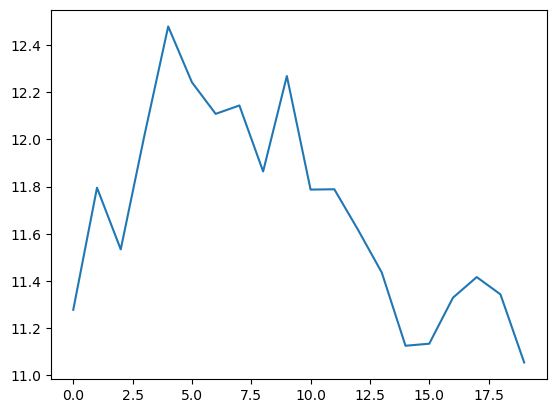

In [135]:
plt.plot(predictions)     # plotting the predictions visually

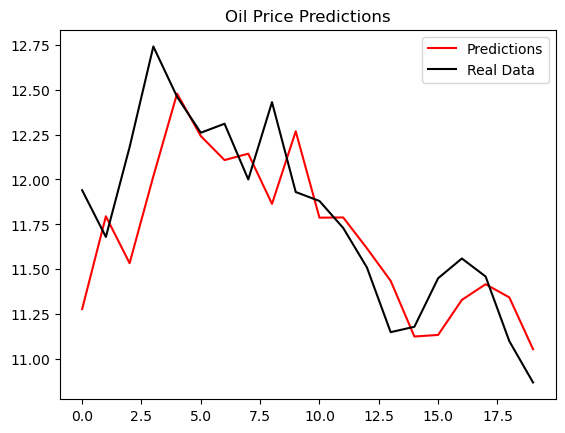

In [136]:
plt.plot(predictions, color = 'red', label = 'Predictions')        
plt.plot(testing_data, color = 'black', label = 'Real Data')

plt.title('Oil Price Predictions')

plt.legend()                                  # Plotting predictions vs real data

In [137]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(testing_data, predictions)               # Calculcating mean squared error from test

print('Mean Squared Error:', mse)                               

Mean Squared Error: 0.11218086433364824


# GRU

In [139]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer


In [146]:
#!pip install tensorflow_addons

In [147]:
testing_data.shape  # checking shape, will re-normalise for new model

(20,)

In [148]:
predictions.shape    # checking shape for new model

(20,)

In [149]:
#predictions = predictions.reshape(-1, 1)

In [150]:
testing_data = testing_data.reshape(-1, 1)     # Converting to 2D for normalisation

In [151]:
predictions    # checking if normalised

array([11.2783165, 11.795085 , 11.533909 , 12.017388 , 12.477826 ,
       12.241482 , 12.107801 , 12.143318 , 11.8638115, 12.267936 ,
       11.78716  , 11.788485 , 11.616711 , 11.435728 , 11.125825 ,
       11.13459  , 11.329462 , 11.416696 , 11.343574 , 11.055079 ],
      dtype=float32)

In [152]:
testing_data    # checking if normalised

array([[11.94],
       [11.68],
       [12.18],
       [12.74],
       [12.46],
       [12.26],
       [12.31],
       [12.  ],
       [12.43],
       [11.93],
       [11.88],
       [11.73],
       [11.51],
       [11.15],
       [11.18],
       [11.45],
       [11.56],
       [11.46],
       [11.1 ],
       [10.87]])

In [153]:
testing_data = scaler.transform(testing_data)         # re-normalising testing_data for new variant

In [154]:
testing_data    # Checked and renormalised

array([[-2.208756  ],
       [-2.31027394],
       [-2.11504712],
       [-1.89639309],
       [-2.00572011],
       [-2.08381083],
       [-2.06428815],
       [-2.18532878],
       [-2.01743372],
       [-2.21266053],
       [-2.23218321],
       [-2.29075126],
       [-2.37665106],
       [-2.51721436],
       [-2.50550076],
       [-2.40007828],
       [-2.35712838],
       [-2.39617374],
       [-2.53673705],
       [-2.62654138]])

In [155]:
testing_data = testing_data.flatten()    # turning to one dimensional

In [156]:
testing_data.shape       # checking new dimension shape

(20,)

In [157]:
final_x_test_data    # checking final_x_test_data whether normalised from previous model

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [158]:
import tensorflow as tf
import sys
import sklearn

print(sys.version)

print(tf.__version__)
print(sklearn.__version__)    # checking versions of important libraries

3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
2.17.0
1.5.1


In [159]:
from tensorflow import keras

print(keras.__version__)

3.5.0


In [160]:
#from tensorflow_addons.rnn import PeepholeLSTMCell
from tensorflow.keras.layers import GRU          # Importing for GRU variant

def build_rnn(units = 5, dropout_rate = 0.2, optimizer = 'adam', num_layers = 2):     # function with default parameters
    rnn = Sequential()
    
    rnn.add(Input(shape = (20, 1)))                                                   # Input layer
    
    rnn.add(GRU(units = units, return_sequences = True))                              # First GRU layer
    rnn.add(Dropout(dropout_rate))
    
    for _ in range(num_layers -1):                                                    # Loop for adding layers
        rnn.add(GRU(units = units, return_sequences = True))
        rnn.add(Dropout(dropout_rate))
    
    rnn.add(GRU(units = units))
    rnn.add(Dropout(dropout_rate))
    
    rnn.add(Dense(units = 1))                                                         # Output layer
    
    rnn.compile(optimizer = optimizer, loss = 'mean_squared_error')                   # Hardcoding mean squared error
    return rnn



In [161]:
model = KerasRegressor(model = build_rnn, verbose = 1)      # To use keras model as scikit-learn model for cross validation

In [162]:
param_distributions = {                                           # Defining the hyperparameter space for a randomized search
    'model__units': randint(5, 50),
    'model__dropout_rate': uniform(0.1, 0.5),
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__num_layers': [1, 2, 3, 4]
}

In [163]:
tscv = TimeSeriesSplit(n_splits = 5)           # Timeseries split to maintain temporal nature of data for validation    

In [164]:
random_search = RandomizedSearchCV(estimator = model,                  # Using RandomizedSearchCV for cross validation
                                  param_distributions = param_distributions,
                                  n_iter = 10,
                                  cv = tscv,
                                  verbose = 2,
                                  n_jobs = -1)                         # To use all available cores for processing


In [165]:
y_training_data                      # Checking data is normalised before randomizedSearchCV is fit

array([-0.51418724, -0.58446889, -0.5532326 , ..., -2.14237888,
       -2.34151023, -2.46255086])

In [166]:
x_training_data.shape               # Checking the shape before randomizedSearchCV is fit

(2671, 20, 1)

In [167]:
y_training_data.shape              # Checking the shape before randomizedSearchCV is fit

(2671,)

In [168]:
final_x_test_data.shape       # Checking the shape calculating test loss

(20, 20, 1)

In [169]:
testing_data.shape            # Checking testing_data shape before loss calculation

(20,)

In [170]:
random_search.fit(x_training_data, y_training_data)              # Fitting the RandomizedSearch

best_model = random_search.best_estimator_                      # Finding best model 
best_params = random_search.best_params_                        # Finding best params 

print('Best parameters:', best_params)           

test_loss = best_model.score(final_x_test_data, testing_data)   # Calculating the test loss

print(f"Test Loss: {test_loss}") 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - loss: 0.3224
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0693
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0612
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0578
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0588
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0528
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0542
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0480
Epoch 9/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0491
Epoch 10/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0453
Epoch 11/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0486
Epoch 12/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0501
Epoch 13/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0440
Epoch 14/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/s

In [171]:
print(test_loss)     # Printing the test loss

0.214073908305363


In [172]:
final_x_test_data    # checking final_x_test_data is normalised

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [173]:
predictions = best_model.predict(final_x_test_data)       # making predictions on final_x_test_data

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [174]:
print(predictions)                   # printing predictions and checking is normalised

[-2.2929869 -2.0797899 -2.2314334 -1.9904357 -1.86336   -1.960657
 -1.9937841 -1.9794431 -2.0975735 -1.91552   -2.1481662 -2.0943098
 -2.1914854 -2.241002  -2.3678627 -2.3356743 -2.2696238 -2.2437534
 -2.2750425 -2.387355 ]


In [175]:
predictions = predictions.reshape(-1, 1)          # Reshaping predictions for inverse_transform

In [176]:
predictions = scaler.inverse_transform(predictions)     # De-normalising predictions for readability

In [177]:
print(predictions)          # checking predictions have been de-normalised

[[11.724274 ]
 [12.270298 ]
 [11.88192  ]
 [12.4991455]
 [12.824601 ]
 [12.575412 ]
 [12.490569 ]
 [12.527299 ]
 [12.224751 ]
 [12.691013 ]
 [12.095178 ]
 [12.23311  ]
 [11.984232 ]
 [11.857413 ]
 [11.532508 ]
 [11.614946 ]
 [11.78411  ]
 [11.850367 ]
 [11.770232 ]
 [11.482586 ]]


In [178]:
testing_data = testing_data.reshape(-1, 1)                 # Reshaping testing_data for inverse_transform
testing_data = scaler.inverse_transform(testing_data)      # De-normalising the testing data

In [179]:
print(testing_data)       # Printing testing_data to ensure is de-normalised

[[11.94]
 [11.68]
 [12.18]
 [12.74]
 [12.46]
 [12.26]
 [12.31]
 [12.  ]
 [12.43]
 [11.93]
 [11.88]
 [11.73]
 [11.51]
 [11.15]
 [11.18]
 [11.45]
 [11.56]
 [11.46]
 [11.1 ]
 [10.87]]


In [181]:
predictions = predictions.flatten()         # Converting predictions to one dimension

In [182]:
testing_data = testing_data.flatten()       # Converting testing_data to one dimension

In [183]:
print(predictions)        # Ensuring predictions are de-normalised and flattened

[11.724274  12.270298  11.88192   12.4991455 12.824601  12.575412
 12.490569  12.527299  12.224751  12.691013  12.095178  12.23311
 11.984232  11.857413  11.532508  11.614946  11.78411   11.850367
 11.770232  11.482586 ]


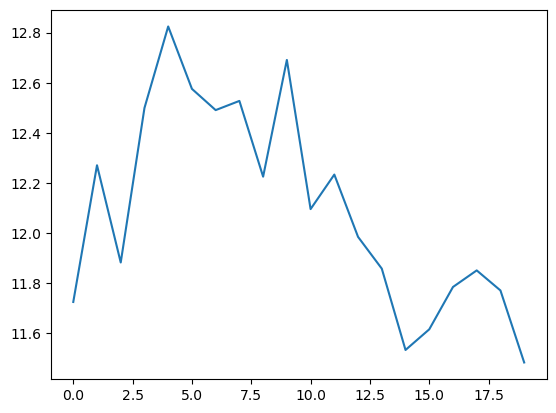

In [184]:
plt.plot(predictions)    # Plotting predictions

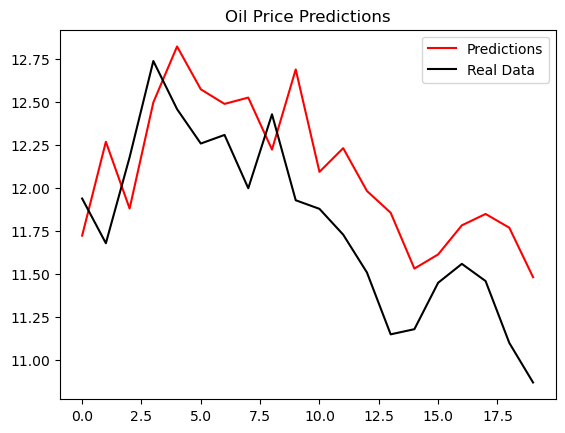

In [185]:
plt.plot(predictions, color = 'red', label = 'Predictions')        
plt.plot(testing_data, color = 'black', label = 'Real Data')

plt.title('Oil Price Predictions')

plt.legend()           # Plotting predictions vs real data to assess performance 

In [186]:
mse = mean_squared_error(testing_data, predictions)               # Calculcating mean squared error from test

print('Mean Squared Error:', mse)                               

Mean Squared Error: 0.19547463589274627


# LSTM with Attention Mechanism

In [187]:
testing_data.shape     # checking testing_data shape for normalisation for new model

(20,)

In [188]:
predictions.shape     # checking predictions shape for normalisation for new model

(20,)

In [189]:
testing_data = testing_data.reshape(-1, 1)     # Converting to 2D for normalisation

In [190]:
predictions          # Checking whether predictions is normalised or not

array([11.724274 , 12.270298 , 11.88192  , 12.4991455, 12.824601 ,
       12.575412 , 12.490569 , 12.527299 , 12.224751 , 12.691013 ,
       12.095178 , 12.23311  , 11.984232 , 11.857413 , 11.532508 ,
       11.614946 , 11.78411  , 11.850367 , 11.770232 , 11.482586 ],
      dtype=float32)

In [191]:
testing_data        # Checking testing_data whether normalised or not

array([[11.94],
       [11.68],
       [12.18],
       [12.74],
       [12.46],
       [12.26],
       [12.31],
       [12.  ],
       [12.43],
       [11.93],
       [11.88],
       [11.73],
       [11.51],
       [11.15],
       [11.18],
       [11.45],
       [11.56],
       [11.46],
       [11.1 ],
       [10.87]])

In [192]:
testing_data = scaler.transform(testing_data)         # renormalising testing_data for new variant

In [193]:
testing_data    # Checked and renormalised

array([[-2.208756  ],
       [-2.31027394],
       [-2.11504712],
       [-1.89639309],
       [-2.00572011],
       [-2.08381083],
       [-2.06428815],
       [-2.18532878],
       [-2.01743372],
       [-2.21266053],
       [-2.23218321],
       [-2.29075126],
       [-2.37665106],
       [-2.51721436],
       [-2.50550076],
       [-2.40007828],
       [-2.35712838],
       [-2.39617374],
       [-2.53673705],
       [-2.62654138]])

In [194]:
testing_data = testing_data.flatten()         # Converting to one-dimension

In [195]:
testing_data.shape          # Checking shape converted correctly

(20,)

In [196]:
final_x_test_data          # Checking final_x_test_data, is still normalised

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [197]:
y_training_data         # Checking y_training_data, is still normalised

array([-0.51418724, -0.58446889, -0.5532326 , ..., -2.14237888,
       -2.34151023, -2.46255086])

In [202]:
x_training_data         # Checking x_training_data, is still normalised

array([[[ 0.13787032],
        [ 0.13787032],
        [-0.20182434],
        ...,
        [-0.44781012],
        [-0.57275528],
        [-0.58446889]],

       [[ 0.13787032],
        [-0.20182434],
        [ 0.11834764],
        ...,
        [-0.57275528],
        [-0.58446889],
        [-0.51418724]],

       [[-0.20182434],
        [ 0.11834764],
        [ 0.11834764],
        ...,
        [-0.58446889],
        [-0.51418724],
        [-0.58446889]],

       ...,

       [[-1.43565781],
        [-1.28338089],
        [-1.26385821],
        ...,
        [-1.90029763],
        [-2.08381083],
        [-2.19313785]],

       [[-1.28338089],
        [-1.26385821],
        [-1.14281758],
        ...,
        [-2.08381083],
        [-2.19313785],
        [-2.14237888]],

       [[-1.26385821],
        [-1.14281758],
        [-1.07644047],
        ...,
        [-2.19313785],
        [-2.14237888],
        [-2.34151023]]])

In [198]:
x_training_data.shape           # Checking shape of x_training_data

(2671, 20, 1)

In [199]:
y_training_data.shape          # Checking shape of y_training_data

(2671,)

In [200]:
final_x_test_data.shape        # Checking shape of final_x_test_data

(20, 20, 1)

In [201]:
testing_data.shape             # Checking shape of testing_data

(20,)

In [203]:
from tensorflow.keras.layers import Attention, Input                                  # Building model with attention mechanism
from tensorflow.keras.models import Model

def build_rnn(units = 5, dropout_rate = 0.2, optimizer = 'adam', num_layers = 2):     # Defining the degault parameters
    inputs = Input(shape = (20, 1))                                                   # Input layer
    
    x = LSTM(units = units, return_sequences = True)(inputs)                          # First LSTM layer and dropout
    x = Dropout(dropout_rate)(x)
    
    
    
    for _ in range(num_layers -1):                                                    # Additional layers and dropouts
        x = LSTM(units = units, return_sequences = True)(x)
        x = Dropout(dropout_rate)(x)
        
        
    attention = Attention()([x, x])                  # Adding attention mechanism to capture important parts of input sequence
    
    x = LSTM(units = units)(attention)               # Final LSTM layer
    x = Dropout(dropout_rate)(x)
    outputs = Dense(units = 1)(x)                    # Output layer
    
    
    rnn = Model(inputs = inputs, outputs = outputs)  # Creating the model with specified input and output layers
    
    
    rnn.compile(optimizer = optimizer, loss = 'mean_squared_error')                    # Hardcoding mean squared error
    return rnn



In [204]:
model = KerasRegressor(model = build_rnn, verbose = 1)      # To use keras model as scikit-learn model for cross validation

In [205]:
param_distributions = {                                           # Defining the hyperparameter space for a randomized search
    'model__units': randint(5, 50),
    'model__dropout_rate': uniform(0.1, 0.5),
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__num_layers': [1, 2, 3, 4]
}

In [206]:
tscv = TimeSeriesSplit(n_splits = 5)           # Timeseries split to maintain temporal nature of data for validation    

In [207]:
random_search = RandomizedSearchCV(estimator = model,                  # Using RandomizedSearchCV for cross validation
                                  param_distributions = param_distributions,
                                  n_iter = 10,
                                  cv = tscv,
                                  verbose = 2,
                                  n_jobs = -1)


In [208]:
testing_data.shape          # Checking testing_data shape before fitting the random_search

(20,)

In [209]:
testing_data = np.array(testing_data).reshape(-1)           # Change to 1D for regressor

testing_data.shape

(20,)

In [210]:
final_x_test_data.shape      # Checking shape of final_x_test_data for calculating test_loss

(20, 20, 1)

In [211]:
random_search.fit(x_training_data, y_training_data)              # Fitting the RandomizedSearch

best_model = random_search.best_estimator_                       # Finding best model 
best_params = random_search.best_params_                         # Finding best params 

print('Best parameters:', best_params)

test_loss = best_model.score(final_x_test_data, testing_data)    # Calculating the test loss from model training

print(f"Test Loss: {test_loss}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Epoch 1/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - loss: 0.3306
Epoch 2/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.1606
Epoch 3/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.1130
Epoch 4/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0995
Epoch 5/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0811
Epoch 6/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0726
Epoch 7/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0674
Epoch 8/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0583
Epoch 9/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0498
Epoch 10/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0531
Epoch 11/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0433
Epoch 12/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0391
Epoch 13/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0362
Epoch 14/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 56m

In [212]:
print(test_loss)    # Printing the test_loss

0.3678422526206444


In [213]:
final_x_test_data   # Checking final_x_test_data still normalised

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [214]:
predictions = best_model.predict(final_x_test_data)  # Making predictions on final_x_test_data

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [215]:
print(predictions)      # Printing the predictions, in normalised format

[-2.2847703 -2.2232108 -2.2567906 -2.1784866 -2.056728  -2.0688255
 -2.0764751 -2.0542817 -2.103175  -2.0337377 -2.127003  -2.149608
 -2.1913834 -2.2455976 -2.327447  -2.347971  -2.3268185 -2.3090851
 -2.310707  -2.3549323]


In [216]:
predictions = predictions.reshape(-1, 1)       # Reshaping predictions for inverse_transform

In [217]:
predictions = scaler.inverse_transform(predictions)   # De-normalising predictions

In [218]:
print(predictions)      # Checking predictions have been de-normalised

[[11.745317 ]
 [11.902979 ]
 [11.8169775]
 [12.017524 ]
 [12.329363 ]
 [12.298379 ]
 [12.278788 ]
 [12.335628 ]
 [12.210406 ]
 [12.388244 ]
 [12.14938  ]
 [12.091485 ]
 [11.984493 ]
 [11.845644 ]
 [11.636018 ]
 [11.583453 ]
 [11.637628 ]
 [11.683044 ]
 [11.67889  ]
 [11.565624 ]]


In [219]:
testing_data = testing_data.reshape(-1, 1)                 # Reshaping testing_data for inverse_transform
testing_data = scaler.inverse_transform(testing_data)      # De-normalising the testing data

In [220]:
print(testing_data)  # Checking testing_data is de-normalised

[[11.94]
 [11.68]
 [12.18]
 [12.74]
 [12.46]
 [12.26]
 [12.31]
 [12.  ]
 [12.43]
 [11.93]
 [11.88]
 [11.73]
 [11.51]
 [11.15]
 [11.18]
 [11.45]
 [11.56]
 [11.46]
 [11.1 ]
 [10.87]]


In [221]:
predictions = predictions.flatten()
testing_data = testing_data.flatten()      # Converting predictions and testing_data to one dimension

In [222]:
print(predictions)    # checking output of prediction is reshaped to one dimension

[11.745317  11.902979  11.8169775 12.017524  12.329363  12.298379
 12.278788  12.335628  12.210406  12.388244  12.14938   12.091485
 11.984493  11.845644  11.636018  11.583453  11.637628  11.683044
 11.67889   11.565624 ]


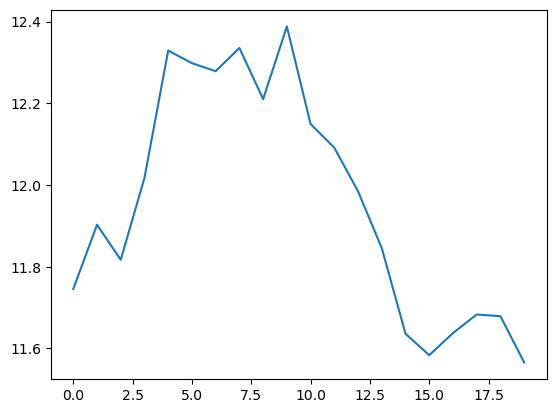

In [223]:
plt.plot(predictions)        # Plotting predictions visually

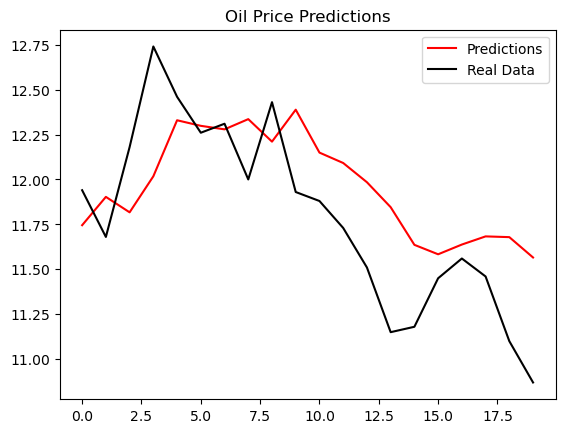

In [224]:
plt.plot(predictions, color = 'red', label = 'Predictions')        
plt.plot(testing_data, color = 'black', label = 'Real Data')

plt.title('Oil Price Predictions')

plt.legend()        # Plotting predictions vs real data for comparison

In [225]:
mse = mean_squared_error(testing_data, predictions)               # Calculcating mean squared error from test

print('Mean Squared Error:', mse)                               

Mean Squared Error: 0.15722954799676012


# LSTM with forget gate bias

In [226]:
testing_data.shape    # Checking shape of testing_data for next model

(20,)

In [227]:
predictions.shape     # Checking shape of predictions

(20,)

In [228]:
testing_data = testing_data.reshape(-1, 1)     # Converting to 2D for normalisation

In [229]:
predictions # Checking predictions are de-noramlised

array([11.745317 , 11.902979 , 11.8169775, 12.017524 , 12.329363 ,
       12.298379 , 12.278788 , 12.335628 , 12.210406 , 12.388244 ,
       12.14938  , 12.091485 , 11.984493 , 11.845644 , 11.636018 ,
       11.583453 , 11.637628 , 11.683044 , 11.67889  , 11.565624 ],
      dtype=float32)

In [230]:
testing_data      # Checking testing_data is de-normalised

array([[11.94],
       [11.68],
       [12.18],
       [12.74],
       [12.46],
       [12.26],
       [12.31],
       [12.  ],
       [12.43],
       [11.93],
       [11.88],
       [11.73],
       [11.51],
       [11.15],
       [11.18],
       [11.45],
       [11.56],
       [11.46],
       [11.1 ],
       [10.87]])

In [231]:
testing_data = scaler.transform(testing_data)         # renormalising testing_data for new variant

In [232]:
testing_data    # Checked and renormalised

array([[-2.208756  ],
       [-2.31027394],
       [-2.11504712],
       [-1.89639309],
       [-2.00572011],
       [-2.08381083],
       [-2.06428815],
       [-2.18532878],
       [-2.01743372],
       [-2.21266053],
       [-2.23218321],
       [-2.29075126],
       [-2.37665106],
       [-2.51721436],
       [-2.50550076],
       [-2.40007828],
       [-2.35712838],
       [-2.39617374],
       [-2.53673705],
       [-2.62654138]])

In [233]:
testing_data = testing_data.flatten()       # Converting testing_data to one dimension

In [234]:
testing_data.shape      # Confirming testing_data is now one-dimensional

(20,)

In [235]:
final_x_test_data       # Checking ginal_x_test_data is still normalised

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [236]:
y_training_data       # Checking y_training_data is still normalised

array([-0.51418724, -0.58446889, -0.5532326 , ..., -2.14237888,
       -2.34151023, -2.46255086])

In [237]:
x_training_data      # Checking x_training_data is still normalised

array([[[ 0.13787032],
        [ 0.13787032],
        [-0.20182434],
        ...,
        [-0.44781012],
        [-0.57275528],
        [-0.58446889]],

       [[ 0.13787032],
        [-0.20182434],
        [ 0.11834764],
        ...,
        [-0.57275528],
        [-0.58446889],
        [-0.51418724]],

       [[-0.20182434],
        [ 0.11834764],
        [ 0.11834764],
        ...,
        [-0.58446889],
        [-0.51418724],
        [-0.58446889]],

       ...,

       [[-1.43565781],
        [-1.28338089],
        [-1.26385821],
        ...,
        [-1.90029763],
        [-2.08381083],
        [-2.19313785]],

       [[-1.28338089],
        [-1.26385821],
        [-1.14281758],
        ...,
        [-2.08381083],
        [-2.19313785],
        [-2.14237888]],

       [[-1.26385821],
        [-1.14281758],
        [-1.07644047],
        ...,
        [-2.19313785],
        [-2.14237888],
        [-2.34151023]]])

In [238]:
x_training_data.shape     # Checking shape of x_training_data

(2671, 20, 1)

In [239]:
y_training_data.shape     # Checking shape of y_training_data

(2671,)

In [240]:
final_x_test_data.shape   # Checking shape of final_x_test_data

(20, 20, 1)

In [241]:
testing_data.shape        # Checking shape of testing_data

(20,)

In [260]:
from tensorflow.keras.initializers import Constant       # Importing Constant for forget_bias

def build_rnn(units = 5, dropout_rate = 0.2, optimizer = 'adam', num_layers = 2, forget_bias = 1.0,
**kwargs):                                                                            # Added forget bias to default parameters
    rnn = Sequential()
    

    
    rnn.add(LSTM(units = units, return_sequences = True, input_shape = (20, 1),
                bias_initializer = Constant(forget_bias)))   # Initialises bias value and first lstm layer
    rnn.add(Dropout(dropout_rate))                           # Dropout to prevent overfitting
    
    for _ in range(num_layers -1):                                                    # Loop for adding layers with bias
        rnn.add(LSTM(units = units, return_sequences = True,
                    bias_initializer = Constant(forget_bias)))
        rnn.add(Dropout(dropout_rate))
    

    rnn.add(LSTM(units = units, bias_initializer = Constant(forget_bias)))            # Final lstm layer with bias
    rnn.add(Dropout(dropout_rate))
    
    rnn.add(Dense(units = 1))                                                         # Output layer
    
    rnn.compile(optimizer = optimizer, loss = 'mean_squared_error')                   # Hardcoding mean squared error
    return rnn

In [261]:
model = KerasRegressor(model = build_rnn, forget_bias = 1.0, verbose = 1)      

# To use keras model as scikit-learn model for cross validation with initial forget_bias set

In [262]:
param_distributions = {                                           # Defining the hyperparameter space for a randomized search
    'model__units': randint(5, 50),
    'model__dropout_rate': uniform(0.1, 0.5),
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__num_layers': [1, 2, 3, 4],
    'model__forget_bias': uniform(0.5, 2.0)                       # Added in the forget gate bias to the searchable space
}

In [263]:
tscv = TimeSeriesSplit(n_splits = 5)           # Timeseries split to maintain temporal nature of data for validation  

In [264]:
random_search = RandomizedSearchCV(estimator = model,                  # Using RandomizedSearchCV for cross validation
                                  param_distributions = param_distributions,
                                  n_iter = 10,
                                  cv = tscv,
                                  verbose = 2,
                                  n_jobs = -1)

In [265]:
testing_data.shape   # Checking testing_data shape before fitting the random_search

(20,)

In [266]:
testing_data = np.array(testing_data).reshape(-1)           # Change to 1D for regressor

testing_data.shape

(20,)

In [267]:
final_x_test_data.shape  # Checking shape of final_x_test_data for calculating test_loss

(20, 20, 1)

In [268]:
random_search.fit(x_training_data, y_training_data)              # Fitting the RandomizedSearch

best_model = random_search.best_estimator_                       # Finding best model 
best_params = random_search.best_params_                         # Finding best params 

print('Best parameters:', best_params)

test_loss = best_model.score(final_x_test_data, testing_data)    # Calculating the test_loss

print(f"Test Loss: {test_loss}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\paddy\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.5023
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2122
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1421
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1114
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0922
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0897
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0740
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0609
Epoch 9/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0604
Epoch 10/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0597
Epoch 11/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0548
Epoch 12/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0531
Epoch 13/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0510
Epoch 14/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0461
Epoch 15/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0422
Epoch 16/30
84/84 ━

In [269]:
print(test_loss)      # Printing thest test_loss

0.3861979934159281


In [270]:
final_x_test_data     # Checking final_x_test_data is still normalised before making predictions

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [271]:
predictions = best_model.predict(final_x_test_data)       # Making predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [272]:
print(predictions)    # Checking predictions are normalised

[-2.2760246 -2.191529  -2.2114596 -2.1429014 -1.9834929 -2.0098116
 -2.0686567 -2.0577188 -2.1098683 -2.043085  -2.1199987 -2.1646783
 -2.1957917 -2.245092  -2.3190274 -2.3418765 -2.308639  -2.2850463
 -2.299623  -2.356539 ]


In [273]:
predictions = predictions.reshape(-1, 1)       # Reshaping predictions for inverse_transform

In [274]:
predictions = scaler.inverse_transform(predictions)      # De-normalising predictions

In [275]:
print(predictions)     # Verifying predictions have been de-normalised

[[11.767716]
 [11.98412 ]
 [11.933076]
 [12.108662]
 [12.516927]
 [12.449521]
 [12.298812]
 [12.326825]
 [12.193263]
 [12.364304]
 [12.167318]
 [12.052888]
 [11.973203]
 [11.846939]
 [11.657581]
 [11.599062]
 [11.684187]
 [11.744611]
 [11.707278]
 [11.561509]]


In [276]:
testing_data = testing_data.reshape(-1, 1)                 # Reshaping testing_data to de-normalise
testing_data = scaler.inverse_transform(testing_data)      # De-normalising the testing data

In [277]:
print(testing_data)     # Verifying testing_data is de-normalised

[[11.94]
 [11.68]
 [12.18]
 [12.74]
 [12.46]
 [12.26]
 [12.31]
 [12.  ]
 [12.43]
 [11.93]
 [11.88]
 [11.73]
 [11.51]
 [11.15]
 [11.18]
 [11.45]
 [11.56]
 [11.46]
 [11.1 ]
 [10.87]]


In [278]:
predictions = predictions.flatten()       
testing_data = testing_data.flatten()         # Making predictions and testing_data one dimensional

In [279]:
print(predictions)      # Verifying the shape change of predictions

[11.767716 11.98412  11.933076 12.108662 12.516927 12.449521 12.298812
 12.326825 12.193263 12.364304 12.167318 12.052888 11.973203 11.846939
 11.657581 11.599062 11.684187 11.744611 11.707278 11.561509]


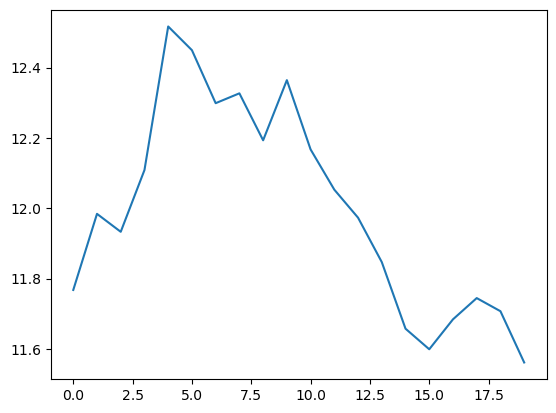

In [280]:
plt.plot(predictions)       # Plotting the predictions visually

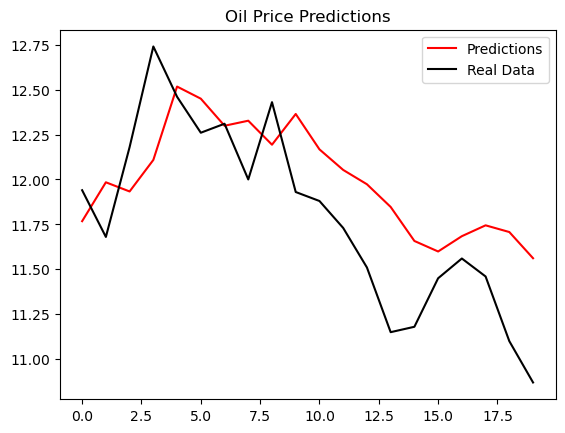

In [281]:
plt.plot(predictions, color = 'red', label = 'Predictions')        
plt.plot(testing_data, color = 'black', label = 'Real Data')

plt.title('Oil Price Predictions')

plt.legend()          # Comparing predictions to the real data for performance evaluation

In [282]:
mse = mean_squared_error(testing_data, predictions)               # Calculcating mean squared error from test

print('Mean Squared Error:', mse)                               

Mean Squared Error: 0.15266416502066607


# LSTM with Attention Mechanism & Forget Gate Bias

In [283]:
testing_data.shape     # Checking testing_data shape for new model

(20,)

In [284]:
predictions.shape     # Checking predictions shape

(20,)

In [285]:
testing_data = testing_data.reshape(-1, 1)     # Converting to testing_data tp 2D for normalisation

In [286]:
predictions   # Checking predictions still de-normalised

array([11.767716, 11.98412 , 11.933076, 12.108662, 12.516927, 12.449521,
       12.298812, 12.326825, 12.193263, 12.364304, 12.167318, 12.052888,
       11.973203, 11.846939, 11.657581, 11.599062, 11.684187, 11.744611,
       11.707278, 11.561509], dtype=float32)

In [287]:
testing_data  # Checking testing_data still de-normalised

array([[11.94],
       [11.68],
       [12.18],
       [12.74],
       [12.46],
       [12.26],
       [12.31],
       [12.  ],
       [12.43],
       [11.93],
       [11.88],
       [11.73],
       [11.51],
       [11.15],
       [11.18],
       [11.45],
       [11.56],
       [11.46],
       [11.1 ],
       [10.87]])

In [288]:
testing_data = scaler.transform(testing_data)         # Re-normalising testing_data for new variant

In [289]:
testing_data    # Checked and renormalised

array([[-2.208756  ],
       [-2.31027394],
       [-2.11504712],
       [-1.89639309],
       [-2.00572011],
       [-2.08381083],
       [-2.06428815],
       [-2.18532878],
       [-2.01743372],
       [-2.21266053],
       [-2.23218321],
       [-2.29075126],
       [-2.37665106],
       [-2.51721436],
       [-2.50550076],
       [-2.40007828],
       [-2.35712838],
       [-2.39617374],
       [-2.53673705],
       [-2.62654138]])

In [290]:
testing_data = testing_data.flatten()   # Changing testing_data to one dimensional

In [291]:
testing_data.shape                      # Checking new shape of testing_data is 1D

(20,)

In [292]:
final_x_test_data       # Checking final_x_test_data is still normalised

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [293]:
y_training_data   # Checking y_training_data is still normalised

array([-0.51418724, -0.58446889, -0.5532326 , ..., -2.14237888,
       -2.34151023, -2.46255086])

In [294]:
x_training_data   # Checking x_training_data is still normalised

array([[[ 0.13787032],
        [ 0.13787032],
        [-0.20182434],
        ...,
        [-0.44781012],
        [-0.57275528],
        [-0.58446889]],

       [[ 0.13787032],
        [-0.20182434],
        [ 0.11834764],
        ...,
        [-0.57275528],
        [-0.58446889],
        [-0.51418724]],

       [[-0.20182434],
        [ 0.11834764],
        [ 0.11834764],
        ...,
        [-0.58446889],
        [-0.51418724],
        [-0.58446889]],

       ...,

       [[-1.43565781],
        [-1.28338089],
        [-1.26385821],
        ...,
        [-1.90029763],
        [-2.08381083],
        [-2.19313785]],

       [[-1.28338089],
        [-1.26385821],
        [-1.14281758],
        ...,
        [-2.08381083],
        [-2.19313785],
        [-2.14237888]],

       [[-1.26385821],
        [-1.14281758],
        [-1.07644047],
        ...,
        [-2.19313785],
        [-2.14237888],
        [-2.34151023]]])

In [295]:
x_training_data.shape       # Checking shape of x_training_data

(2671, 20, 1)

In [296]:
y_training_data.shape       # Checking shape of y_training_data

(2671,)

In [297]:
final_x_test_data.shape     # Checking shape of final_x_test_data

(20, 20, 1)

In [298]:
testing_data.shape         # Checking shape of testing_data

(20,)

In [300]:
#!pip install tfa-nightly

   ---------------------------------------- 733.2/733.2 kB 2.3 MB/s eta 0:00:00


In [303]:
def build_rnn(units = 5, dropout_rate = 0.2, optimizer = 'adam', num_layers = 2, forget_bias = 1.0,
**kwargs):                                             # Defines default parameters with forget_bias
   
    inputs = Input(shape = (20, 1))                    # Added the input layer


    x = LSTM(units = units, return_sequences = True, bias_initializer = Constant(forget_bias))(inputs)
    x = Dropout(dropout_rate)(x)             # First LSTM layer with bias initialised as constant value
    
    for _ in range(num_layers -1):                                                    # Loop for adding layers
        x = LSTM(units = units, return_sequences = True, bias_initializer = Constant(forget_bias))(x)
        x = Dropout(dropout_rate)(x)         # Adding another LSTM layer with bias and dropout layer
        
    attention = Attention()([x, x])          # Adds attention mechanism to help model focus on important parts of input
    
    x = LSTM(units = units, bias_initializer = Constant(forget_bias))(attention)   # Final layer with bias
    x = Dropout(dropout_rate)(x)
    outputs = Dense(units = 1)(x)            # Output layer added
    
    rnn = Model(inputs = inputs, outputs = outputs) # Create the RNN with specified inputs and outputs
    
    rnn.compile(optimizer = optimizer, loss = 'mean_squared_error')                  # Hardcoding mean squared error
    return rnn

In [304]:
model = KerasRegressor(model = build_rnn, forget_bias = 1.0, verbose = 1)      

# To use keras model as scikit-learn model for cross validation with forget_bias initial value of 1.0

In [305]:
param_distributions = {                                           # Defining the hyperparameter space for a randomized search
    'model__units': randint(5, 50),
    'model__dropout_rate': uniform(0.1, 0.5),
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__num_layers': [1, 2, 3, 4],
    'model__forget_bias': uniform(0.5, 2.0)                       # Added in the forget gate bias to the searchable space
}

In [306]:
tscv = TimeSeriesSplit(n_splits = 5)           # Timeseries split to maintain temporal nature of data for validation  

In [307]:
random_search = RandomizedSearchCV(estimator = model,                  # Using RandomizedSearchCV for cross validation
                                  param_distributions = param_distributions,
                                  n_iter = 10,
                                  cv = tscv,
                                  verbose = 2,
                                  n_jobs = -1)

In [308]:
testing_data.shape    # Checking shape of testing_data

(20,)

In [309]:
testing_data = np.array(testing_data).reshape(-1)           # Change to 1D for regressor

testing_data.shape                                          # Verifying is now one dimensional

(20,)

In [310]:
final_x_test_data.shape      # Checking shape of final_x_test_data for test_loss calculation

(20, 20, 1)

In [311]:
random_search.fit(x_training_data, y_training_data)              # Fitting the RandomizedSearch

best_model = random_search.best_estimator_                       # Finding best model 
best_params = random_search.best_params_                         # Finding best params 

print('Best parameters:', best_params)

test_loss = best_model.score(final_x_test_data, testing_data)    # Calculating the test_loss for the training model

print(f"Test Loss: {test_loss}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 1.2364
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7067
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1922
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1388
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1111
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1033
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0911
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0906
Epoch 9/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0933
Epoch 10/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0717
Epoch 11/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0759
Epoch 12/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0767
Epoch 13/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0654
Epoch 14/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/st

In [312]:
print(test_loss)       # Printing the training test_loss

-0.3545483473571549


In [313]:
final_x_test_data      # Checking final_x_test_data is still normalised for predictions

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [314]:
predictions = best_model.predict(final_x_test_data)      # Making predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [315]:
print(predictions)        # Print predictions, still normalised

[-2.0620818 -2.0904944 -2.1113746 -2.1230364 -2.1175773 -2.1075687
 -2.1037948 -2.1029923 -2.105867  -2.105077  -2.1071725 -2.1125517
 -2.1203218 -2.1301904 -2.141757  -2.1536984 -2.1641195 -2.172313
 -2.1789153 -2.186152 ]


In [316]:
predictions = predictions.reshape(-1, 1)    # Reshaping predictions for inverse_transform

In [317]:
predictions = scaler.inverse_transform(predictions)  # De-normalising the predictions for readability

In [318]:
print(predictions)      # Checking predictions are now de-normalised

[[12.315651]
 [12.242883]
 [12.189405]
 [12.159538]
 [12.17352 ]
 [12.199153]
 [12.208818]
 [12.210874]
 [12.203511]
 [12.205535]
 [12.200168]
 [12.186391]
 [12.166491]
 [12.141216]
 [12.111592]
 [12.081009]
 [12.054319]
 [12.033335]
 [12.016426]
 [11.997891]]


In [319]:
testing_data = testing_data.reshape(-1, 1)                 # Reshaping the testing_data for inverse_transform
testing_data = scaler.inverse_transform(testing_data)      # De-normalising the testing data

In [320]:
print(testing_data)   # Confirming testing_data de-normalised for metric calculation

[[11.94]
 [11.68]
 [12.18]
 [12.74]
 [12.46]
 [12.26]
 [12.31]
 [12.  ]
 [12.43]
 [11.93]
 [11.88]
 [11.73]
 [11.51]
 [11.15]
 [11.18]
 [11.45]
 [11.56]
 [11.46]
 [11.1 ]
 [10.87]]


In [321]:
predictions = predictions.flatten()
testing_data = testing_data.flatten()     # Converting predictions and testing_data to one dimension

In [322]:
print(predictions)      # Checking new shape of predictions

[12.315651 12.242883 12.189405 12.159538 12.17352  12.199153 12.208818
 12.210874 12.203511 12.205535 12.200168 12.186391 12.166491 12.141216
 12.111592 12.081009 12.054319 12.033335 12.016426 11.997891]


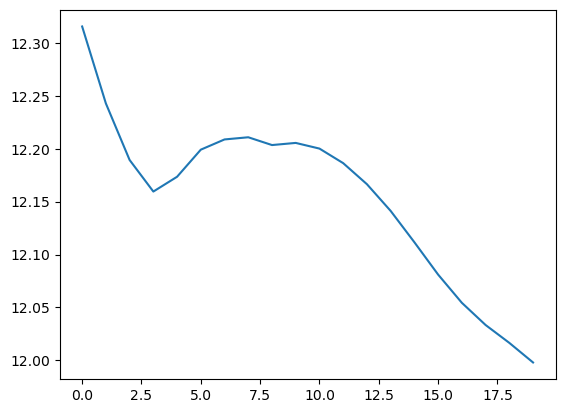

In [323]:
plt.plot(predictions)   # Plotting predictions visually

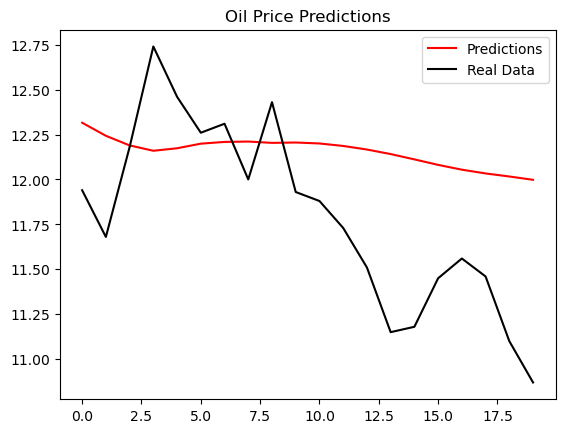

In [324]:
plt.plot(predictions, color = 'red', label = 'Predictions')        
plt.plot(testing_data, color = 'black', label = 'Real Data')

plt.title('Oil Price Predictions')

plt.legend()                  # Comparing predictions to real data for performance evaluation

In [325]:
mse = mean_squared_error(testing_data, predictions)               # Calculcating mean squared error from test

print('Mean Squared Error:', mse)   

Mean Squared Error: 0.3369018099593838


# Bidirectional LSTM

In [326]:
testing_data.shape    # Checking shape of testing_data for new model

(20,)

In [327]:
predictions.shape     # Checking shape of predictions

(20,)

In [328]:
testing_data = testing_data.reshape(-1, 1)     # Converting to 2D for normalisation

In [329]:
predictions # Checking predictions are still de-normalised

array([12.315651, 12.242883, 12.189405, 12.159538, 12.17352 , 12.199153,
       12.208818, 12.210874, 12.203511, 12.205535, 12.200168, 12.186391,
       12.166491, 12.141216, 12.111592, 12.081009, 12.054319, 12.033335,
       12.016426, 11.997891], dtype=float32)

In [330]:
testing_data   # Checking shape of testing_data and still de-normalised

array([[11.94],
       [11.68],
       [12.18],
       [12.74],
       [12.46],
       [12.26],
       [12.31],
       [12.  ],
       [12.43],
       [11.93],
       [11.88],
       [11.73],
       [11.51],
       [11.15],
       [11.18],
       [11.45],
       [11.56],
       [11.46],
       [11.1 ],
       [10.87]])

In [331]:
testing_data = scaler.transform(testing_data)         # Re-normalising testing_data for new variant

In [332]:
testing_data                                          # Checked and re-normalised

array([[-2.208756  ],
       [-2.31027394],
       [-2.11504712],
       [-1.89639309],
       [-2.00572011],
       [-2.08381083],
       [-2.06428815],
       [-2.18532878],
       [-2.01743372],
       [-2.21266053],
       [-2.23218321],
       [-2.29075126],
       [-2.37665106],
       [-2.51721436],
       [-2.50550076],
       [-2.40007828],
       [-2.35712838],
       [-2.39617374],
       [-2.53673705],
       [-2.62654138]])

In [333]:
testing_data = testing_data.flatten()     # Converted testing_data to one dimension

In [334]:
testing_data.shape                        # Checking new shape of testing_data

(20,)

In [335]:
final_x_test_data     # Checking final_x_test_data is still normalised

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [336]:
y_training_data        # Checking y_training_data is still normalised

array([-0.51418724, -0.58446889, -0.5532326 , ..., -2.14237888,
       -2.34151023, -2.46255086])

In [337]:
x_training_data        # Checking x_training_data is still normalised

array([[[ 0.13787032],
        [ 0.13787032],
        [-0.20182434],
        ...,
        [-0.44781012],
        [-0.57275528],
        [-0.58446889]],

       [[ 0.13787032],
        [-0.20182434],
        [ 0.11834764],
        ...,
        [-0.57275528],
        [-0.58446889],
        [-0.51418724]],

       [[-0.20182434],
        [ 0.11834764],
        [ 0.11834764],
        ...,
        [-0.58446889],
        [-0.51418724],
        [-0.58446889]],

       ...,

       [[-1.43565781],
        [-1.28338089],
        [-1.26385821],
        ...,
        [-1.90029763],
        [-2.08381083],
        [-2.19313785]],

       [[-1.28338089],
        [-1.26385821],
        [-1.14281758],
        ...,
        [-2.08381083],
        [-2.19313785],
        [-2.14237888]],

       [[-1.26385821],
        [-1.14281758],
        [-1.07644047],
        ...,
        [-2.19313785],
        [-2.14237888],
        [-2.34151023]]])

In [338]:
x_training_data.shape       # Checking shape of x_training_data

(2671, 20, 1)

In [339]:
y_training_data.shape       # Checking shape of y_training_data

(2671,)

In [340]:
final_x_test_data.shape    # Checking shape of final_x_test_data

(20, 20, 1)

In [341]:
testing_data.shape         # Checking shape of testing_data

(20,)

In [342]:
from tensorflow.keras.layers import Bidirectional    # Importing the Bidirectional wrapper for processing forward + backward

def build_rnn(units = 5, dropout_rate = 0.2, optimizer = 'adam', num_layers = 2):     # Defining default parameters
    rnn = Sequential()
    

    
    rnn.add(Bidirectional(LSTM(units = units, return_sequences = True), input_shape = (20, 1)))
    rnn.add(Dropout(dropout_rate))                      # Adding Bidirectional LSTM layer, input shape and dropout rate
    
    for _ in range(num_layers -1):                                                    # Loop for adding layers
        rnn.add(Bidirectional(LSTM(units = units, return_sequences = True)))             
        rnn.add(Dropout(dropout_rate))                  # Adding another Bidirectional and dropout layer
    

    rnn.add(Bidirectional(LSTM(units = units)))         # Adding a final Bidirectional and dropout layer
    rnn.add(Dropout(dropout_rate))
    
    rnn.add(Dense(units = 1))                           # Output layer
    
    rnn.compile(optimizer = optimizer, loss = 'mean_squared_error')                   # Hardcoding mean squared error
    return rnn


In [343]:
model = KerasRegressor(build_fn = build_rnn, verbose = 1)      # To use keras model as scikit-learn model for cross validation

In [344]:
param_distributions = {                                           # Defining the hyperparameter space for a randomized search
    'model__units': randint(5, 50),
    'model__dropout_rate': uniform(0.1, 0.5),
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__num_layers': [1, 2, 3, 4]
}

In [345]:
tscv = TimeSeriesSplit(n_splits = 5)           # Timeseries split to maintain temporal nature of data for validation    

In [346]:
random_search = RandomizedSearchCV(estimator = model,             # Using RandomizedSearchCV for cross validation
                                  param_distributions = param_distributions,
                                  n_iter = 10,
                                  cv = tscv,
                                  verbose = 2,
                                  n_jobs = -1)


In [347]:
testing_data.shape  # Checking shape of testing_data before fitting random_search

(20,)

In [348]:
testing_data = np.array(testing_data).reshape(-1)           # Changing testing_data to 1D for regressor

testing_data.shape                                          # Verifying testing_data is one dimensional

(20,)

In [349]:
final_x_test_data.shape      # Checking the shape of final_x_test_data for test_loss calculation

(20, 20, 1)

In [350]:
random_search.fit(x_training_data, y_training_data)              # Fitting the RandomizedSearch

best_model = random_search.best_estimator_                       # Finding best model 
best_params = random_search.best_params_                         # Finding best params 

print('Best parameters:', best_params)

test_loss = best_model.score(final_x_test_data, testing_data)    # Calculating the test_loss

print(f"Test Loss: {test_loss}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\paddy\anaconda3\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\paddy\anaconda3\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.1661
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0645
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0548
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0546
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0492
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0461
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0392
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0412
Epoch 9/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0385
Epoch 10/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0396
Epoch 11/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0462
Epoch 12/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0385
Epoch 13/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0405
Epoch 14/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0393
Epoch 15/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - 

In [351]:
print(test_loss)     # Printing the test_loss

0.5703705290053134


In [352]:
predictions = best_model.predict(final_x_test_data)     # Making predictions using final_x_test_data

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [353]:
print(testing_data)                                     # Checking testing_data is still normalised

[-2.208756   -2.31027394 -2.11504712 -1.89639309 -2.00572011 -2.08381083
 -2.06428815 -2.18532878 -2.01743372 -2.21266053 -2.23218321 -2.29075126
 -2.37665106 -2.51721436 -2.50550076 -2.40007828 -2.35712838 -2.39617374
 -2.53673705 -2.62654138]


In [354]:
print(predictions)                                     # Checking predictions is still normalised

[-2.3842456 -2.3202553 -2.322839  -2.2397265 -2.0893228 -2.0749319
 -2.1232142 -2.144699  -2.2134156 -2.167052  -2.23187   -2.27697
 -2.3221226 -2.3803806 -2.4670372 -2.501733  -2.4660242 -2.4228895
 -2.4183853 -2.4819572]


In [355]:
predictions = predictions.reshape(-1, 1)              # Reshaping predictions for inverse_transform

In [356]:
predictions = scaler.inverse_transform(predictions)   # De-normalising predictions for readability


In [357]:
testing_data = testing_data.reshape(-1, 1)            # Reshaping testing_data for inverse_transform
testing_data = scaler.inverse_transform(testing_data) # De-normalising the testing data

In [358]:
print(testing_data)     # Verifying testing_data is de-normalised

[[11.94]
 [11.68]
 [12.18]
 [12.74]
 [12.46]
 [12.26]
 [12.31]
 [12.  ]
 [12.43]
 [11.93]
 [11.88]
 [11.73]
 [11.51]
 [11.15]
 [11.18]
 [11.45]
 [11.56]
 [11.46]
 [11.1 ]
 [10.87]]


In [359]:
predictions = predictions.flatten()            # Changing predictions to one dimensional

In [360]:
testing_data = testing_data.flatten()          # Changing testing_data to one dimensional

In [361]:
print(predictions)                             # Verifying the shape and de-normalisation of predictions

[11.490549  11.654436  11.6478195 11.860681  12.245883  12.28274
 12.159082  12.104057  11.928066  12.046809  11.880802  11.765296
 11.649654  11.500448  11.27851   11.18965   11.281104  11.391578
 11.403113  11.240297 ]


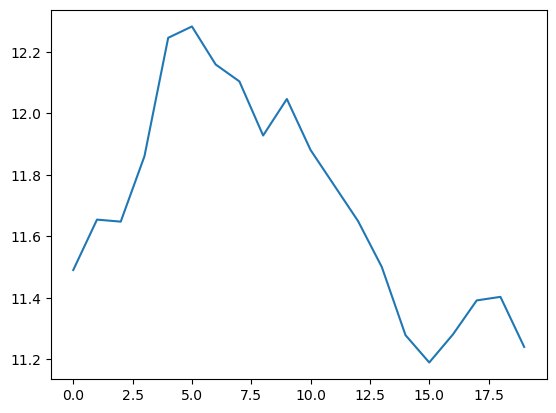

In [362]:
plt.plot(predictions)                          # Plotting predictions for visual observation

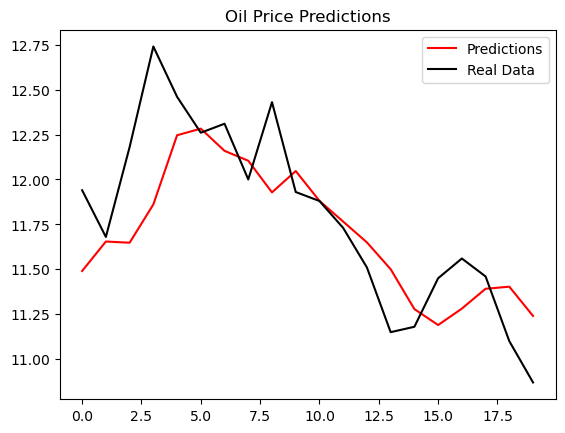

In [363]:
plt.plot(predictions, color = 'red', label = 'Predictions')        
plt.plot(testing_data, color = 'black', label = 'Real Data')

plt.title('Oil Price Predictions')

plt.legend()                                  # Plotting predictions vs real data for performance assessment

In [364]:
mse = mean_squared_error(testing_data, predictions)               # Calculcating mean squared error from test

print('Mean Squared Error:', mse)                               

Mean Squared Error: 0.10685700671102523
